In [2]:
import os
import glob
import pathlib
import pandas as pd
import numpy as np
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import string
import nltk
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [3]:
# defining function that contains punctuation removal
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

## Extracting files


In [4]:
def extract_files(folder_path):
    csv_files = glob.glob(os.path.join(folder_path, "*.csv"))
    dataframes = []

    for file in csv_files:
        df = pd.read_csv(file)
        dataframes.append(df)
    return dataframes


extracted = extract_files("Topic_modelling")

In [5]:
alldata = pd.DataFrame()
for listitems in extracted:
    alldata = pd.concat([alldata, listitems])

## Feature extraction

In [6]:
alldata.head()

,headlines,description,content,url,category
0,Nirmala Sitharaman to equal Morarji Desai’s re...,With the presentation of the interim budget on...,"Sitharaman, the first full-time woman finance ...",https://indianexpress.com/article/business/bud...,business
1,"‘Will densify network, want to be at least no....","'In terms of market share, we aim to double it...",The merger of Tata group’s budget airlines Air...,https://indianexpress.com/article/business/avi...,business
2,Air India group to induct an aircraft every si...,Air India currently has 117 operational aircra...,The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business
3,Red Sea woes: Exporters seek increased credit ...,Rising attacks forced shippers to consider the...,Indian exporters have asked the central govern...,https://indianexpress.com/article/business/red...,business
4,Air India group to induct a plane every 6 days...,"Apart from fleet expansion, 2024 will also see...",The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business


In [7]:
targets = alldata["category"]

In [8]:
alldata.describe(include="object")

,headlines,description,content,url,category
count,10000,10000,10000,10000,10000
unique,9987,9978,9991,9990,5
top,Japan launches antimonopoly probe into Google’...,"As universities begin the admission process, s...",Grand Slam fever grips tennis fans all over th...,https://indianexpress.com/article/education/ig...,business
freq,2,2,6,2,2000


Remove punctuation, numbers and stopwords from the text. Then, apply stemming to the words.

In [9]:
alldata["remove_puntuations"] = alldata["headlines"].apply(lambda x: remove_punctuation(x))
alldata["to_lower"] = alldata["remove_puntuations"].apply(lambda x: x.lower())

In [10]:
alldata.head()

,headlines,description,content,url,category,remove_puntuations,to_lower
0,Nirmala Sitharaman to equal Morarji Desai’s re...,With the presentation of the interim budget on...,"Sitharaman, the first full-time woman finance ...",https://indianexpress.com/article/business/bud...,business,Nirmala Sitharaman to equal Morarji Desai’s re...,nirmala sitharaman to equal morarji desai’s re...
1,"‘Will densify network, want to be at least no....","'In terms of market share, we aim to double it...",The merger of Tata group’s budget airlines Air...,https://indianexpress.com/article/business/avi...,business,‘Will densify network want to be at least no 2...,‘will densify network want to be at least no 2...
2,Air India group to induct an aircraft every si...,Air India currently has 117 operational aircra...,The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business,Air India group to induct an aircraft every si...,air india group to induct an aircraft every si...
3,Red Sea woes: Exporters seek increased credit ...,Rising attacks forced shippers to consider the...,Indian exporters have asked the central govern...,https://indianexpress.com/article/business/red...,business,Red Sea woes Exporters seek increased credit a...,red sea woes exporters seek increased credit a...
4,Air India group to induct a plane every 6 days...,"Apart from fleet expansion, 2024 will also see...",The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business,Air India group to induct a plane every 6 days...,air india group to induct a plane every 6 days...


In [11]:
# Tokenization
import re
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

alldata["tokens"] = alldata["to_lower"].apply(lambda x: tokenize(x))

In [12]:
alldata.head()

,headlines,description,content,url,category,remove_puntuations,to_lower,tokens
0,Nirmala Sitharaman to equal Morarji Desai’s re...,With the presentation of the interim budget on...,"Sitharaman, the first full-time woman finance ...",https://indianexpress.com/article/business/bud...,business,Nirmala Sitharaman to equal Morarji Desai’s re...,nirmala sitharaman to equal morarji desai’s re...,"[nirmala, sitharaman, to, equal, morarji, desa..."
1,"‘Will densify network, want to be at least no....","'In terms of market share, we aim to double it...",The merger of Tata group’s budget airlines Air...,https://indianexpress.com/article/business/avi...,business,‘Will densify network want to be at least no 2...,‘will densify network want to be at least no 2...,"[, will, densify, network, want, to, be, at, l..."
2,Air India group to induct an aircraft every si...,Air India currently has 117 operational aircra...,The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business,Air India group to induct an aircraft every si...,air india group to induct an aircraft every si...,"[air, india, group, to, induct, an, aircraft, ..."
3,Red Sea woes: Exporters seek increased credit ...,Rising attacks forced shippers to consider the...,Indian exporters have asked the central govern...,https://indianexpress.com/article/business/red...,business,Red Sea woes Exporters seek increased credit a...,red sea woes exporters seek increased credit a...,"[red, sea, woes, exporters, seek, increased, c..."
4,Air India group to induct a plane every 6 days...,"Apart from fleet expansion, 2024 will also see...",The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business,Air India group to induct a plane every 6 days...,air india group to induct a plane every 6 days...,"[air, india, group, to, induct, a, plane, ever..."


In [13]:
#nltk.download('punkt')
#from nltk.tokenize import sent_tokenize

#feature = sent_tokenize(feature)

In [14]:
# Removing stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text

alldata["no_stopwords"] = alldata["tokens"].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abiro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
alldata.head()

,headlines,description,content,url,category,remove_puntuations,to_lower,tokens,no_stopwords
0,Nirmala Sitharaman to equal Morarji Desai’s re...,With the presentation of the interim budget on...,"Sitharaman, the first full-time woman finance ...",https://indianexpress.com/article/business/bud...,business,Nirmala Sitharaman to equal Morarji Desai’s re...,nirmala sitharaman to equal morarji desai’s re...,"[nirmala, sitharaman, to, equal, morarji, desa...","[nirmala, sitharaman, equal, morarji, desai, r..."
1,"‘Will densify network, want to be at least no....","'In terms of market share, we aim to double it...",The merger of Tata group’s budget airlines Air...,https://indianexpress.com/article/business/avi...,business,‘Will densify network want to be at least no 2...,‘will densify network want to be at least no 2...,"[, will, densify, network, want, to, be, at, l...","[, densify, network, want, least, 2, city, pai..."
2,Air India group to induct an aircraft every si...,Air India currently has 117 operational aircra...,The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business,Air India group to induct an aircraft every si...,air india group to induct an aircraft every si...,"[air, india, group, to, induct, an, aircraft, ...","[air, india, group, induct, aircraft, every, s..."
3,Red Sea woes: Exporters seek increased credit ...,Rising attacks forced shippers to consider the...,Indian exporters have asked the central govern...,https://indianexpress.com/article/business/red...,business,Red Sea woes Exporters seek increased credit a...,red sea woes exporters seek increased credit a...,"[red, sea, woes, exporters, seek, increased, c...","[red, sea, woes, exporters, seek, increased, c..."
4,Air India group to induct a plane every 6 days...,"Apart from fleet expansion, 2024 will also see...",The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business,Air India group to induct a plane every 6 days...,air india group to induct a plane every 6 days...,"[air, india, group, to, induct, a, plane, ever...","[air, india, group, induct, plane, every, 6, d..."


In [16]:
# Lemmatization
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

alldata["lemma"] = alldata["no_stopwords"].apply(lambda x: lemmatizing(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abiro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
alldata.head()

,headlines,description,content,url,category,remove_puntuations,to_lower,tokens,no_stopwords,lemma
0,Nirmala Sitharaman to equal Morarji Desai’s re...,With the presentation of the interim budget on...,"Sitharaman, the first full-time woman finance ...",https://indianexpress.com/article/business/bud...,business,Nirmala Sitharaman to equal Morarji Desai’s re...,nirmala sitharaman to equal morarji desai’s re...,"[nirmala, sitharaman, to, equal, morarji, desa...","[nirmala, sitharaman, equal, morarji, desai, r...","[nirmala, sitharaman, equal, morarji, desai, r..."
1,"‘Will densify network, want to be at least no....","'In terms of market share, we aim to double it...",The merger of Tata group’s budget airlines Air...,https://indianexpress.com/article/business/avi...,business,‘Will densify network want to be at least no 2...,‘will densify network want to be at least no 2...,"[, will, densify, network, want, to, be, at, l...","[, densify, network, want, least, 2, city, pai...","[, densify, network, want, least, 2, city, pai..."
2,Air India group to induct an aircraft every si...,Air India currently has 117 operational aircra...,The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business,Air India group to induct an aircraft every si...,air india group to induct an aircraft every si...,"[air, india, group, to, induct, an, aircraft, ...","[air, india, group, induct, aircraft, every, s...","[air, india, group, induct, aircraft, every, s..."
3,Red Sea woes: Exporters seek increased credit ...,Rising attacks forced shippers to consider the...,Indian exporters have asked the central govern...,https://indianexpress.com/article/business/red...,business,Red Sea woes Exporters seek increased credit a...,red sea woes exporters seek increased credit a...,"[red, sea, woes, exporters, seek, increased, c...","[red, sea, woes, exporters, seek, increased, c...","[red, sea, woe, exporter, seek, increased, cre..."
4,Air India group to induct a plane every 6 days...,"Apart from fleet expansion, 2024 will also see...",The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business,Air India group to induct a plane every 6 days...,air india group to induct a plane every 6 days...,"[air, india, group, to, induct, a, plane, ever...","[air, india, group, induct, plane, every, 6, d...","[air, india, group, induct, plane, every, 6, d..."


In [18]:
# unlist the list of lists
def unlist(list):
    return " ".join(list)
alldata["unlist"] = alldata["lemma"].apply(lambda x: unlist(x))

In [19]:
alldata.head()

,headlines,description,content,url,category,remove_puntuations,to_lower,tokens,no_stopwords,lemma,unlist
0,Nirmala Sitharaman to equal Morarji Desai’s re...,With the presentation of the interim budget on...,"Sitharaman, the first full-time woman finance ...",https://indianexpress.com/article/business/bud...,business,Nirmala Sitharaman to equal Morarji Desai’s re...,nirmala sitharaman to equal morarji desai’s re...,"[nirmala, sitharaman, to, equal, morarji, desa...","[nirmala, sitharaman, equal, morarji, desai, r...","[nirmala, sitharaman, equal, morarji, desai, r...",nirmala sitharaman equal morarji desai record ...
1,"‘Will densify network, want to be at least no....","'In terms of market share, we aim to double it...",The merger of Tata group’s budget airlines Air...,https://indianexpress.com/article/business/avi...,business,‘Will densify network want to be at least no 2...,‘will densify network want to be at least no 2...,"[, will, densify, network, want, to, be, at, l...","[, densify, network, want, least, 2, city, pai...","[, densify, network, want, least, 2, city, pai...",densify network want least 2 city pair air in...
2,Air India group to induct an aircraft every si...,Air India currently has 117 operational aircra...,The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business,Air India group to induct an aircraft every si...,air india group to induct an aircraft every si...,"[air, india, group, to, induct, an, aircraft, ...","[air, india, group, induct, aircraft, every, s...","[air, india, group, induct, aircraft, every, s...",air india group induct aircraft every six day ...
3,Red Sea woes: Exporters seek increased credit ...,Rising attacks forced shippers to consider the...,Indian exporters have asked the central govern...,https://indianexpress.com/article/business/red...,business,Red Sea woes Exporters seek increased credit a...,red sea woes exporters seek increased credit a...,"[red, sea, woes, exporters, seek, increased, c...","[red, sea, woes, exporters, seek, increased, c...","[red, sea, woe, exporter, seek, increased, cre...",red sea woe exporter seek increased credit fre...
4,Air India group to induct a plane every 6 days...,"Apart from fleet expansion, 2024 will also see...",The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business,Air India group to induct a plane every 6 days...,air india group to induct a plane every 6 days...,"[air, india, group, to, induct, a, plane, ever...","[air, india, group, induct, plane, every, 6, d...","[air, india, group, induct, plane, every, 6, d...",air india group induct plane every 6 day throu...


### Using TfIDvectorizer

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier

import pickle

cv = KFold(n_splits=10, shuffle=True, random_state=42)

**Preparing TFID vectors for OneVsRest Model**

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
targets = le.fit_transform(targets)

In [31]:
le.classes_

array([0, 1, 2, 3, 4], dtype=int64)

In [34]:
alldata["category"].value_counts() 

category
business         2000
education        2000
entertainment    2000
sports           2000
technology       2000
Name: count, dtype: int64

In [42]:
x_train_tf, x_test_tf, y_train_tf, y_test_tf = train_test_split(alldata["unlist"], targets, test_size = 0.3, random_state=42)

In [27]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
tfidf_vectorizer.fit(x_train_tf)
x_train_tfid = tfidf_vectorizer.transform(x_train_tf)
x_test_tfid = tfidf_vectorizer.transform(x_test_tf)

In [22]:
joblib.dump(tfidf_vectorizer, 'transformer_model.joblib')

['transformer_model.joblib']

Model: XgbClassifier


In [70]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from matplotlib import pyplot

In [87]:
xgb = XGBClassifier(n_estimators=5000, eta=0.05, max_depth=5)
evalset = [(x_train_tfid, y_train_tf), (x_test_tfid, y_test_tf)]

In [88]:
fit_mod = xgb.fit(x_train_tfid, y_train_tf, eval_set=evalset, verbose=0)   

In [89]:
xgbpreds = fit_mod.predict(x_test_tfid)
accscore = accuracy_score(y_test_tf, xgbpreds)
results = fit_mod.evals_result()

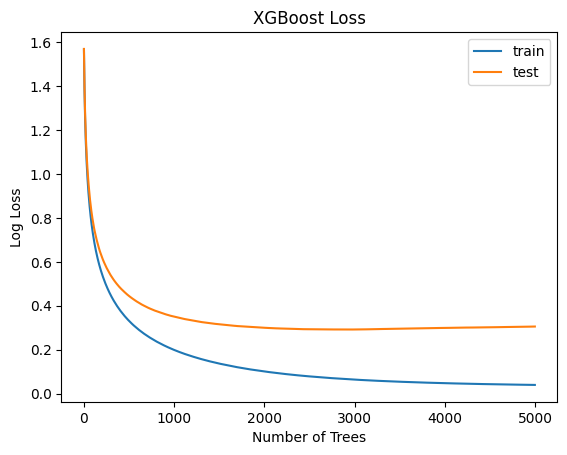

In [90]:
pyplot.plot(results['validation_0']['mlogloss'], label='train')
pyplot.plot(results['validation_1']['mlogloss'], label='test')
pyplot.title("XGBoost Loss")
pyplot.xlabel("Number of Trees")
pyplot.ylabel("Log Loss")
pyplot.legend()
pyplot.show()

In [92]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
cm_ovr = classification_report(y_test_tf, xgbpreds, target_names=le.classes_)
print(cm_ovr)

               precision    recall  f1-score   support

     business       0.90      0.88      0.89       626
    education       0.95      0.92      0.94       591
entertainment       0.95      0.87      0.91       610
       sports       0.84      0.93      0.88       584
   technology       0.87      0.90      0.89       589

     accuracy                           0.90      3000
    macro avg       0.90      0.90      0.90      3000
 weighted avg       0.90      0.90      0.90      3000



In [93]:
pickle.dump(xgb, open('model.pkl', 'wb'))